<a href="https://colab.research.google.com/github/jadrk040507/machine-learning/blob/main/01_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to ML

This is the first notebook of a series of notebooks on ML fundamentals and real world applications. Most of it's contents are heavily based on the book *Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems* by Aurélien Geron.


## Data prep

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
import os
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There is a total of 20,640 instances. Note that `total_bedrooms` has only 20,433 non-null entries. Also, all columns are numerical except `ocean proximity`.


In [5]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


Now let's have a look to the summary statistics of the numerical variables.

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Sometimes, it's very useful to include a visual representation of the data.

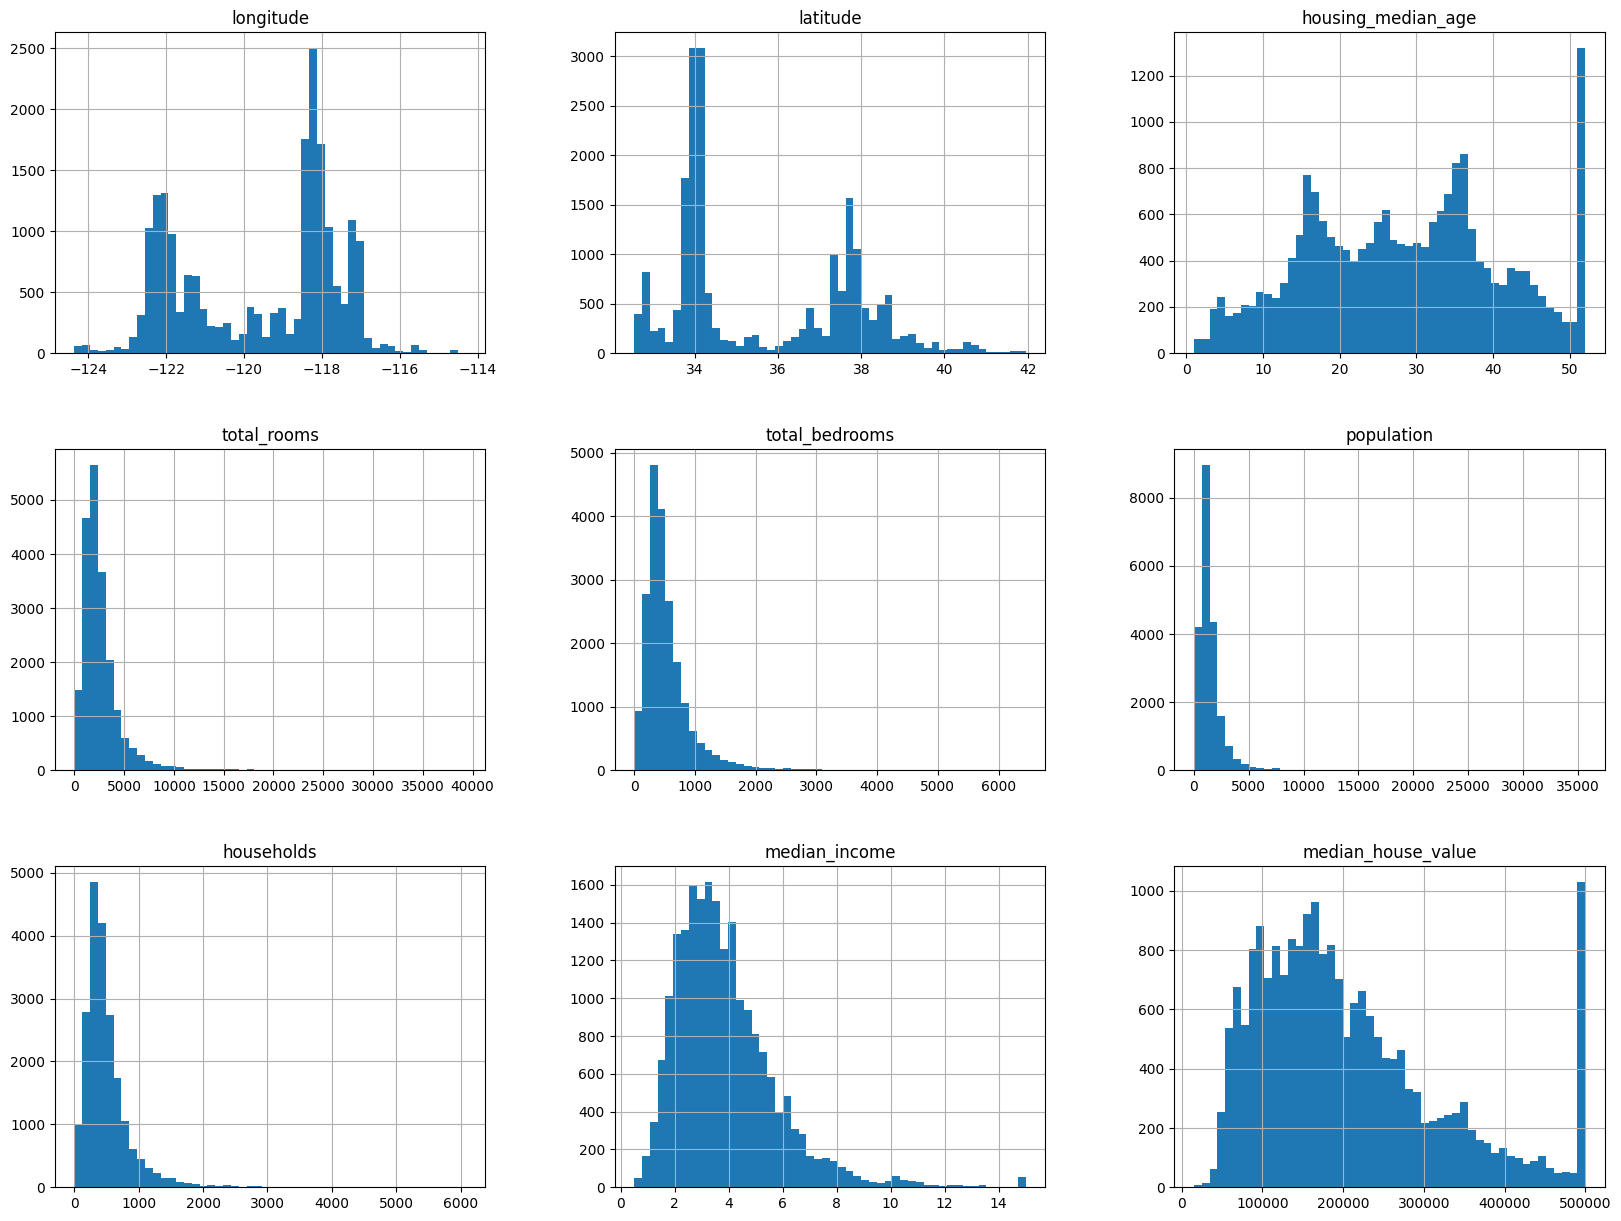

In [7]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

1. Median income does not look like is expressed in USD (it has been scaled and capped at 15).
2. Housing median age and median house value are also capped. There are two options when handling with this type of data:
   1. Collect proper labels for the districts for whose labels where capped.
   2. Remove those districts from the training set (and from the test set).
3. The attributes have different scales.
4. Many histograms are *heavy-tailed* (to the right).

## Creating a test set

In order to measure our generalization error (limit the *data snooping bias*) as well as to reduce overfitting, we divide our dataset into training and test sets. The training set will be used to calibrate the model, while the test set will be used to evaluate the model's performance. As a rule of thumb, the latter is usually 20% the size of the total dataset.-

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(train_set.shape, test_set.shape)

(16512, 10) (4128, 10)


When dealing with categorized data, also refered as stratified, it's a better practice to sample taking into account the proportion of each strata to fix for representativity.

First, we will create our strata using median income into 5 categories.

In [9]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"], bins = [0, 1.5, 3, 4.5, 6, np.inf], labels = [1, 2, 3, 4, 5])
housing["income_cat"].value_counts(normalize=True)

,proportion
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]

test_set["income_cat"].value_counts(normalize=True)

,proportion
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


## Visualizing Data

Let's begin with data visualization according to the best practices.

In [11]:
# We will make a copy of the train set to rename it as housing for faster manipulation
housing = train_set.copy()
housing.drop("income_cat", axis=1, inplace=True)

### Geographical Data

<Axes: xlabel='latitude', ylabel='longitude'>

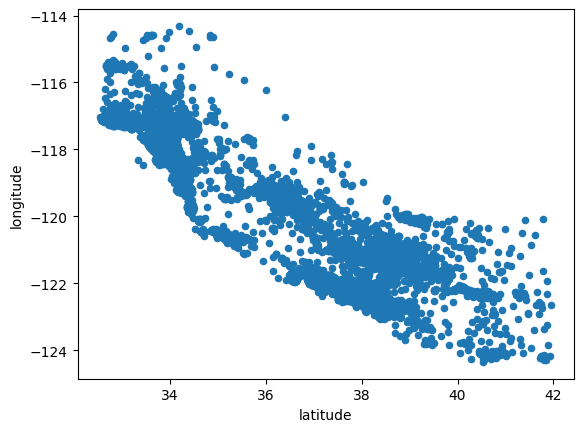

In [12]:
housing.plot(x="latitude", y="longitude", kind="scatter")

It looks fine. Yet, it is non informative on the density of the points. Let's try to include transparency.

<Axes: xlabel='latitude', ylabel='longitude'>

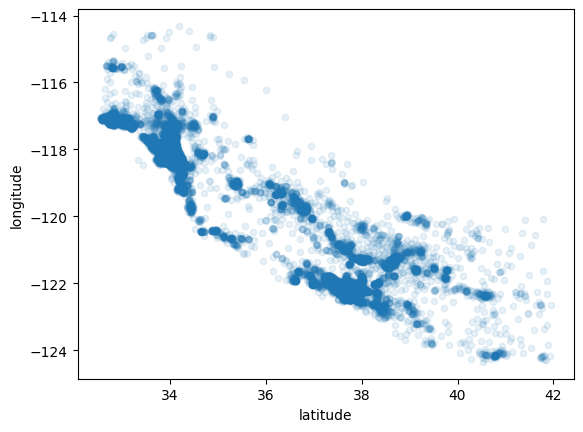

In [13]:
housing.plot(x="latitude", y="longitude", kind="scatter", alpha=0.1)

Now, let's add dimensionality to our graph by including other characteristics by tweaking size and color.

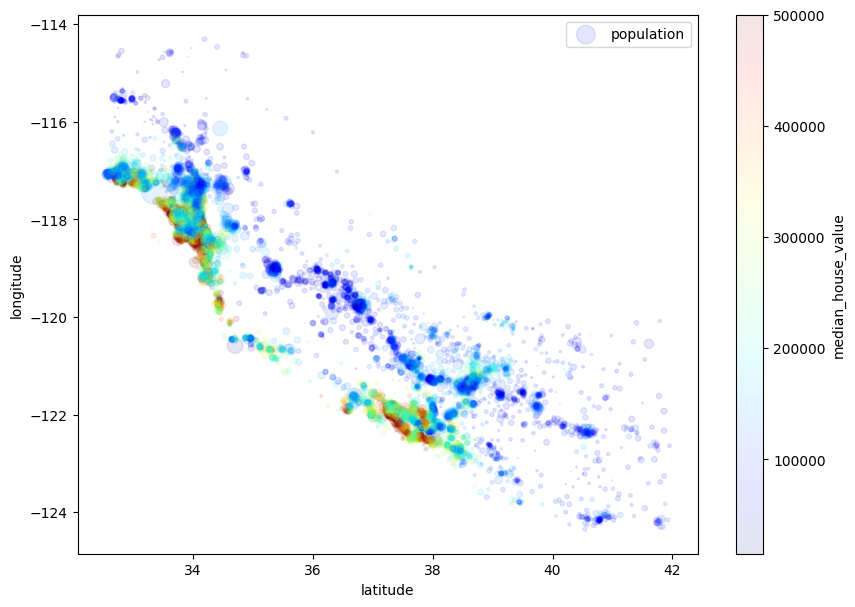

In [14]:
housing.plot(x="latitude", y="longitude",
             kind="scatter",
             alpha=0.1,
             s=housing["population"]/100,
             label="population",
             figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"),
             colorbar=True
            )
plt.legend()

### Looking for Correlations

Plotting data combinations on 2D scatter plots can tell a lot on their relationship. Another indicator for relationship is Pearson's correlation coefficient, $\rho$, which is a bounded parameter (from $[-1, 1]$) which expresses linear association.

In [15]:
matrix_corr = housing.corr(numeric_only=True)
matrix_corr["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


If we prefer doing scatter plots then we can achieve it using the next code:

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

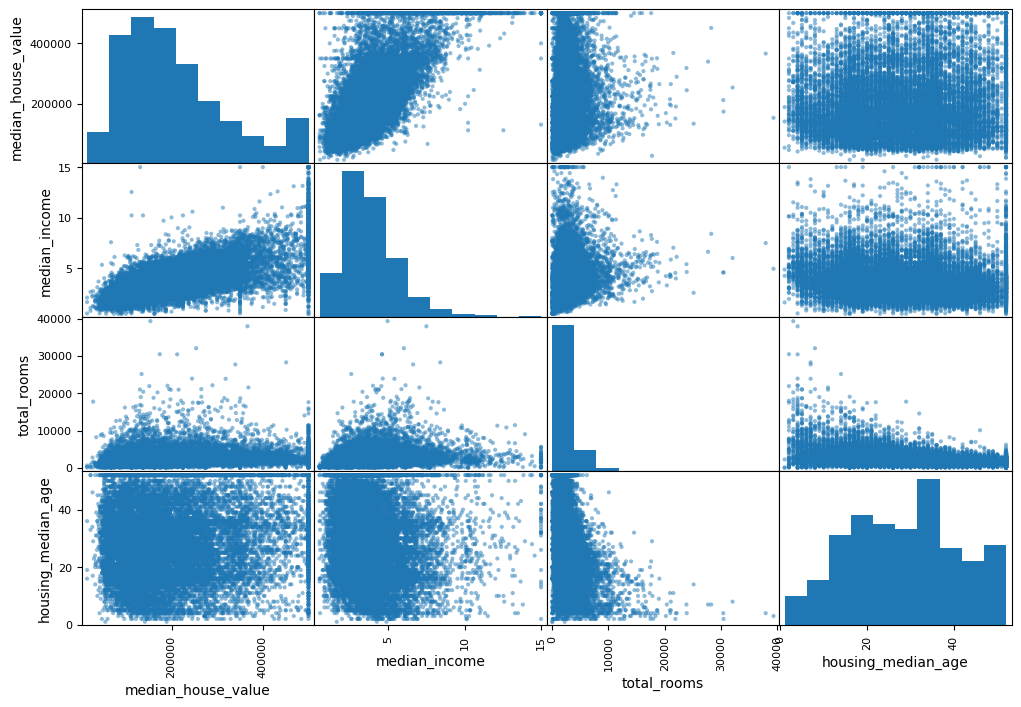

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

Explore with attribute combinations.

In [17]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


## Prepare the Data for ML Algorithms

In [18]:
# Make a clean copy of the training set
housing = train_set.drop(["median_house_value","income_cat"], axis=1) # drop labels for training set
housing_labels = train_set["median_house_value"].copy() # extract labels

In [19]:
from sklearn.impute import SimpleImputer

housing_num = housing.drop("ocean_proximity", axis=1)

imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)

X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns)

What’s happening?
1. We drop any non‑numeric column (ocean_proximity) because SimpleImputer can only compute statistics on numeric data.
2. We create a SimpleImputer with strategy="median".
3. Calling imputer.fit() computes and stores the median of each column in imputer.statistics_.
4. Calling imputer.transform() replaces missing values with the learned medians.
5. We wrap the result back into a DataFrame so we keep our column names.

### Scikit‑Learn Design Principles
Scikit‑Learn’s API is built on a few simple, consistent rules that make it easy to learn, inspect, and combine building blocks:

1. Consistency
   1. Estimators implement `.fit(X, y)` to learn parameters (e.g., `SimpleImputer`, `LinearRegression`).
   2. Transformers implement `.transform(X)`, and offer a shortcut `.fit_transform(X, y)` when sensible.
   3. Predictors implement `.predict(X)` (and often `.score(X, y)`).
2. Inspection
   1. All hyperparameters are public attributes (e.g. `estimator.strategy`).
   2. Learned parameters are exposed with a trailing underscore (e.g. `imputer.statistics_`).
3. Non‑proliferation of Classes
   1. Data are NumPy arrays or SciPy sparse matrices—no custom data containers.
   2. Hyperparameters are plain Python types (strings, numbers).
4. Composition
   1. You can chain transformers and estimators into a `Pipeline` to build complex workflows from simple parts.
5. Sensible Defaults
   1. Every estimator comes with reasonable default settings so you can get a working baseline with minimal code.


## Handling with Categorical Data

Remember `ocean_proximity`, it was a non-numerical variable. In order for MLs to work with categorical variables we first need to tell the machine to assing a number to each category, or encode them.

In [20]:
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(ordinal_encoder.categories_)
print(housing_cat_encoded[:10])

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
[[1.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]]


The problem with this type of encoding is that it mantains an order (that's why it's called ordinal). This works fine when dealing with categories like low, medium, high, etc. But not for data that do not represent order. For this, we use the *one-hot encoding* method, or *dummy* attributes.

In [21]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])